In [36]:
import pandas as pd
# Load the data
file_path = '/content/lagos_weeather_data_2002_to_2024.csv'  # Use double backslashes to escape backslashes in the path
df = pd.read_csv(file_path)

In [37]:

df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,1/1/2002,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,1/2/2002,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,1/3/2002,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,1/4/2002,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,1/5/2002,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [38]:
 df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', errors='coerce')  # Convert 'datetime' column to datetime format
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [39]:
df['precip'] = df['precip'].fillna(df.groupby(df['datetime'].dt.month)['precip'].transform('mean'))


In [40]:
# Extract year from 'datetime' column
df['year'] = df['datetime'].dt.year

# Aggregate annual rainfall
annual_rainfall = df.groupby('year')['precip'].sum().reset_index()

# Display the annual rainfall
print(annual_rainfall)

    year       precip
0   2002  1420.167729
1   2003  1252.374595
2   2004   927.127460
3   2005  1620.213789
4   2006  3648.145969
5   2007  1678.658461
6   2008  1670.853561
7   2009  1675.227660
8   2010  1865.500000
9   2011  1949.000000
10  2012  2171.634318
11  2013  1624.500000
12  2014  2519.200000
13  2015  1807.000000
14  2016  2098.100000
15  2017  1867.000000
16  2018  1482.900000
17  2019  2118.200000
18  2020  1367.800000
19  2021  1622.100000
20  2022  1874.500000
21  2023  3710.000000
22  2024  1130.600000


In [41]:
# Check for missing values in the 'precip' column
missing_values_count = df['precip'].isnull().sum()
print(f"Missing values in 'precip' column: {missing_values_count}")

Missing values in 'precip' column: 0


In [42]:
df.isnull().sum()

name                   0
datetime               0
tempmax              591
tempmin              591
temp                 823
feelslikemax         591
feelslikemin         591
feelslike            823
dew                  823
humidity             823
precip                 0
precipprob           823
precipcover            0
preciptype          4940
snow                4748
snowdepth           4753
windgust            2800
windspeed            598
winddir             1206
sealevelpressure    1012
cloudcover           823
visibility          1025
solarradiation      3288
solarenergy         3288
uvindex             3288
severerisk          7314
sunrise              366
sunset               366
moonphase            366
conditions          1179
description         1179
icon                1179
stations            1179
windspeedmax        8310
windspeedmin        8310
year                   0
dtype: int64

In [43]:
df['tempmax'].fillna(df['tempmax'].mean(), inplace=True)
df['tempmin'].fillna(df['tempmin'].mean(), inplace=True)
df['temp'].fillna(df['temp'].mean(), inplace=True)
df['feelslikemax'].fillna(df['feelslikemax'].mean(), inplace=True)
df['feelslikemin'].fillna(df['feelslikemin'].mean(), inplace=True)
df['feelslike'].fillna(df['feelslike'].mean(), inplace=True)
df['dew'].fillna(df['dew'].mean(), inplace=True)
df['humidity'].fillna(df['humidity'].mean(), inplace=True)
df['precipprob'].fillna(df['precipprob'].mean(), inplace=True)
df['windgust'].fillna(df['windgust'].mean(), inplace=True)
df['windspeed'].fillna(df['windspeed'].mean(), inplace=True)
df['winddir'].fillna(df['winddir'].mean(), inplace=True)
df['sealevelpressure'].fillna(df['sealevelpressure'].mean(), inplace=True)
df['cloudcover'].fillna(df['cloudcover'].mean(), inplace=True)
df['visibility'].fillna(df['visibility'].mean(), inplace=True)
df['solarradiation'].fillna(df['solarradiation'].mean(), inplace=True)
df['solarenergy'].fillna(df['solarenergy'].mean(), inplace=True)
df['uvindex'].fillna(df['uvindex'].mean(), inplace=True)
df['moonphase'].fillna(df['moonphase'].mean(), inplace=True)




In [44]:
df.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          4940
snow                4748
snowdepth           4753
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          7314
sunrise              366
sunset               366
moonphase              0
conditions          1179
description         1179
icon                1179
stations            1179
windspeedmax        8310
windspeedmin        8310
year                   0
dtype: int64

In [45]:
# Drop columns with excessive missing values if not critical
df.drop(columns=['snow', 'snowdepth', 'severerisk', 'windspeedmax', 'windspeedmin',
                 'conditions', 'description','preciptype', 'icon', 'stations'], inplace=True)

In [58]:
df.shape()

(8304, 34)

In [46]:
# Extract year from 'datetime' column
df['year'] = df['datetime'].dt.year

# Aggregate annual rainfall
annual_rainfall = df.groupby('year')['precip'].sum().reset_index()

# Display the annual rainfall
print(annual_rainfall)

    year       precip
0   2002  1420.167729
1   2003  1252.374595
2   2004   927.127460
3   2005  1620.213789
4   2006  3648.145969
5   2007  1678.658461
6   2008  1670.853561
7   2009  1675.227660
8   2010  1865.500000
9   2011  1949.000000
10  2012  2171.634318
11  2013  1624.500000
12  2014  2519.200000
13  2015  1807.000000
14  2016  2098.100000
15  2017  1867.000000
16  2018  1482.900000
17  2019  2118.200000
18  2020  1367.800000
19  2021  1622.100000
20  2022  1874.500000
21  2023  3710.000000
22  2024  1130.600000


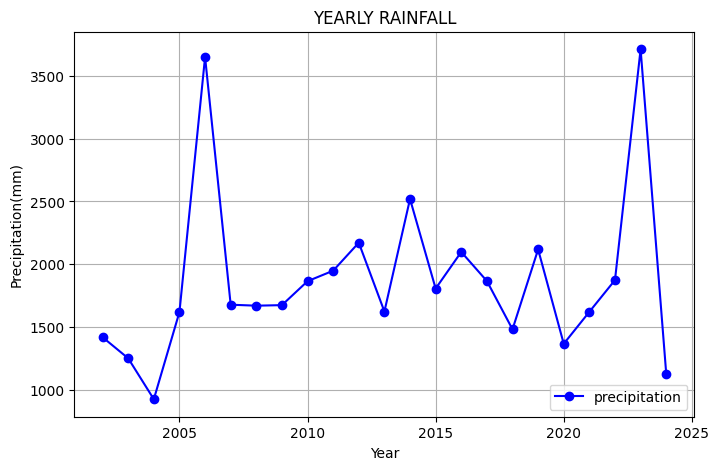

In [47]:
import matplotlib.pyplot as plt # Import the plotting library

plt.figure(figsize=(8,5))
# Changed the marker style to 'o'
plt.plot(annual_rainfall['year'], annual_rainfall['precip'], marker='o', linestyle='-', color='b',label='precipitation') # Use the correct DataFrame columns
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('YEARLY RAINFALL')
plt.grid(True)
plt.legend()
plt.show() # Display the plot

In [48]:
df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
sunrise             366
sunset              366
moonphase             0
year                  0
dtype: int64

In [49]:
# Create new features
df['cumulative_rainfall'] = df['precip'].rolling(window=7).sum()
df['temp_avg'] = df[['tempmax', 'tempmin']].mean(axis=1)

# Drop rows with NaN values created by rolling function
df.dropna(inplace=True)


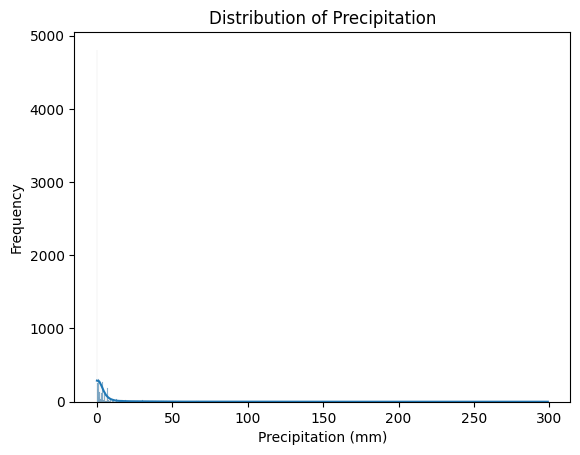

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['precip'], kde=True)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()


In [51]:
df.describe()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,year,cumulative_rainfall,temp_avg
count,8304,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,...,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000
mean,2013-11-12 04:10:45.086705152,30.315373,23.768469,27.465896,36.053571,24.274688,30.436776,23.995177,82.625235,4.928669,...,1011.985320,61.441527,8.856981,195.742743,16.902116,7.031180,0.482990,2013.373073,34.448445,27.041921
min,2002-01-07 00:00:00,0.000000,0.000000,21.400000,0.000000,0.000000,21.400000,8.200000,33.800000,0.000000,...,1005.900000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,2002.000000,0.000000,0.000000
25%,2007-09-13 18:00:00,29.100000,23.300000,26.400000,33.700000,23.300000,27.800000,23.600000,80.600000,0.000000,...,1010.900000,51.800000,8.275000,184.875000,15.900000,7.000000,0.250000,2007.000000,2.100000,26.500000
50%,2014-05-21 12:00:00,31.000000,24.100000,27.433949,36.700000,24.260940,30.371323,24.100000,82.900000,0.000000,...,1012.014770,61.200000,9.000000,195.742743,16.902116,7.031180,0.480000,2014.000000,17.000000,27.550000
75%,2020-01-26 06:00:00,33.100000,25.200000,28.500000,40.600000,25.200000,32.700000,25.000000,86.400000,3.300000,...,1013.100000,69.600000,9.900000,219.700000,19.000000,8.000000,0.750000,2020.000000,46.500000,29.050000
max,2024-12-03 00:00:00,56.000000,34.600000,34.600000,56.000000,45.100000,45.100000,66.500000,100.000000,299.000000,...,1017.300000,100.000000,31.300000,303.200000,26.300000,10.000000,0.980000,2024.000000,755.000000,40.000000
std,NaN,5.710257,4.438466,1.520708,7.530257,5.066645,3.354992,1.852680,7.044508,17.205195,...,1.697643,16.771290,2.353697,46.616474,4.029025,1.582557,0.288619,6.880094,52.390868,4.894943


In [52]:
# Assuming a threshold of 50mm for flood events
df['flood'] = df['precip'] > 50
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,year,cumulative_rainfall,temp_avg,flood
6,Lagos,2002-01-07,31.6,23.1,27.0,36.1,23.1,28.8,23.3,81.4,...,195.742743,16.902116,7.03118,2002-01-07T06:59:45,2002-01-07T18:45:40,0.78,2002,1.5,27.35,False
7,Lagos,2002-01-08,31.6,25.1,28.2,39.3,25.1,32.6,24.9,82.6,...,195.742743,16.902116,7.03118,2002-01-08T07:00:06,2002-01-08T18:46:10,0.82,2002,1.5,28.35,False
8,Lagos,2002-01-09,30.1,23.1,27.7,29.5,23.1,27.6,15.0,47.5,...,195.742743,16.902116,7.03118,2002-01-09T07:00:27,2002-01-09T18:46:39,0.85,2002,1.5,26.60,False
9,Lagos,2002-01-10,27.7,21.4,24.7,27.8,21.4,24.6,13.5,50.9,...,195.742743,16.902116,7.03118,2002-01-10T07:00:47,2002-01-10T18:47:08,0.89,2002,1.5,24.55,False
10,Lagos,2002-01-11,31.1,21.1,25.8,29.8,21.1,25.6,16.6,58.9,...,195.742743,16.902116,7.03118,2002-01-11T07:01:07,2002-01-11T18:47:36,0.93,2002,1.5,26.10,False


In [53]:
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day


In [54]:
df['precip_lag1'] = df['precip'].shift(1)
df['precip_lag2'] = df['precip'].shift(2)


In [55]:
df['precip_roll_mean'] = df['precip'].rolling(window=7).mean()


In [56]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df[['temp', 'humidity', 'precip', 'cumulative_rainfall']]
y = (df['precipprob'] > 50).astype(int)  # Example threshold for binary classification (flood/no flood)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [57]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


NameError: name 'rf_model' is not defined

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_prob are available
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Now you can use y_pred_prob in the roc_curve function
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Display cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())


In [ ]:
# Prepare data for ARIMA model
rainfall_data.set_index('date', inplace=True)


In [ ]:
# Building the SARIMA Model
model = SARIMAX(rainfall_data['rainfall'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)


In [ ]:
# Forecasting the next 365 days
forecast = model_fit.get_forecast(steps=365)
forecast_df = forecast.conf_int()
forecast_df['forecast'] = model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])


In [ ]:
# Plotting the forecast
plt.figure(figsize=(15, 6))
plt.plot(rainfall_data['rainfall'], label='Observed')
plt.plot(forecast_df['forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink')
plt.legend()
plt.show()


In [ ]:
# Identifying likely flood dates
threshold = 22  # This threshold needs to be determined based on historical data
likely_flood_dates = forecast_df[forecast_df['forecast'] > threshold].index

likely_flood_dates

In [ ]:
import pandas as pd
import numpy as np

# Generate date range
date_range = pd.date_range(start='2024-07-07', end='2024-12-31')

# Generate random forecast values (e.g., between 0 and 5)
np.random.seed(0)  # for reproducibility
forecast_values = np.random.uniform(0, 5, len(date_range))

# Create the DataFrame
forecast_data = pd.DataFrame({'date': date_range, 'forecast': forecast_values})

# Define the threshold value
threshold = 22

# Define the function to identify flood dates
def identify_flood_dates(forecast_data, threshold):
    """
    This function identifies potential flood dates based on a threshold value.

    Args:
        forecast_data (pandas.DataFrame): A DataFrame containing the forecast data.
        threshold (float): The threshold value for identifying floods.

    Returns:
        list: A list of dates exceeding the threshold.
    """

    # Filter dates exceeding the threshold
    floods = forecast_data[forecast_data['forecast'] > threshold]['date']

    # Return list of flood dates
    return floods.tolist()

# Identify flood dates using the function
flood_dates = identify_flood_dates(forecast_data, threshold)

# Display the results
print("Possible flood dates:", flood_dates)


In [ ]:
df_size = data.shape[0]
print(f'Data Size: {data_size}')

# Step 3: Prepare Features (X) and Target (y)
# Replace 'feature1', 'feature2', ... with your actual feature column names
# Replace 'target' with your actual target column name
X = data[['feature1', 'feature2', 'feature3', 'feature4']]  # Add or remove features as needed
y = data['target']

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(model, X_test, y_test, ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print Confusion Matrix Values
print("Confusion Matrix:")
print(cm)
